<a href="https://colab.research.google.com/github/sellauno/machinelearning/blob/main/Tugas12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Sella Novanda

Kelas : TI-4J

NIM : 2241727030

## Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Studi Kasus 2: Kompresi Citra

In [16]:
from sklearn.datasets import load_sample_image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


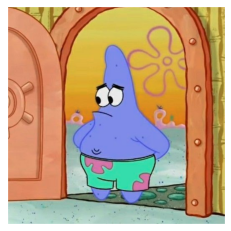

In [18]:
import cv2 as cv
url = '/content/drive/MyDrive/Kuliah/IMG_20220407_064219.jpg'

picture = cv.imread(url)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(picture);

In [19]:
picture.shape

(523, 523, 3)

In [27]:
data = picture / 255.0
data = data.reshape(523 * 523, 3)
data.shape

(273529, 3)

In [28]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

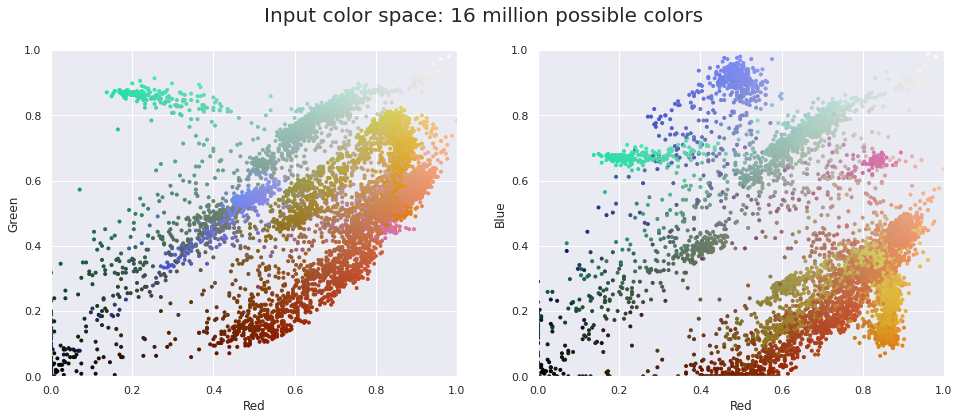

In [29]:
plot_pixels(data, title='Input color space: 16 million possible colors')

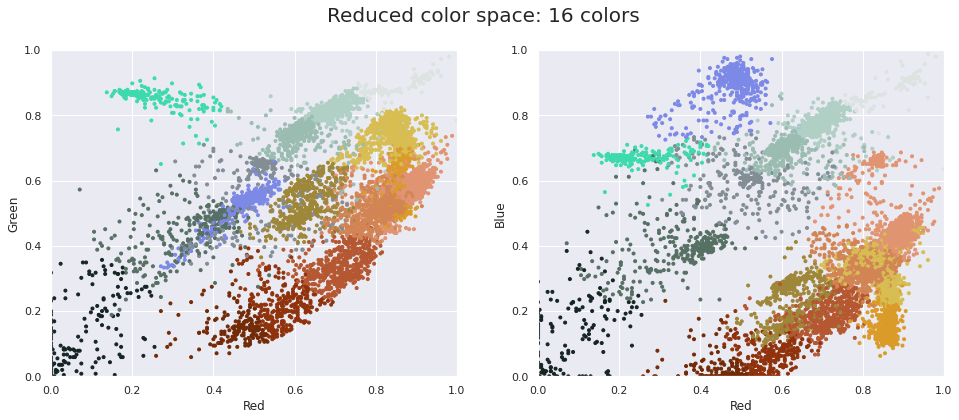

In [30]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

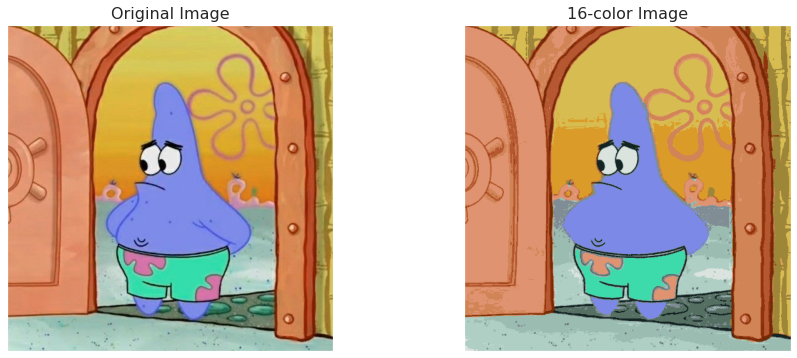

In [32]:
picture_recolored = new_colors.reshape(picture.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(picture)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(picture_recolored)
ax[1].set_title('16-color Image', size=16);

## Elbow Method - Within-Cluster-Sum of Squared Errors (WSS)

In [33]:
from sklearn.cluster import KMeans
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
   
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

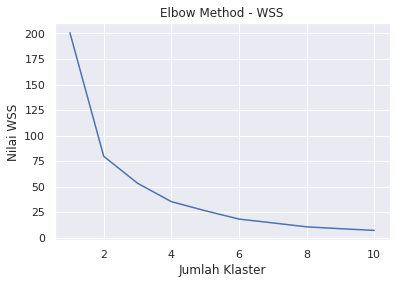

In [36]:
ycall = [1,2,3,4,5,6,7,8,9,10]

yWSS = calculate_WSS(X, 10)

plt.plot(ycall, yWSS)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()

## The Silhouette Method

In [37]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

sil

[0.49215648268306905,
 0.42110575032702,
 0.44709257821561577,
 0.48268880990560786,
 0.5050889720730242,
 0.5139271962501577,
 0.5266242006418874,
 0.5272008332516124,
 0.5127774481454509]

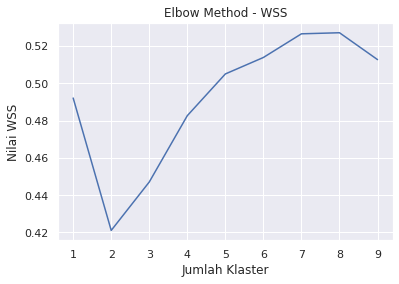

In [38]:
xsil = [1,2,3,4,5,6,7,8,9]

plt.plot(xsil, sil)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()